# ML Challenge (Optional)

Train, test, optimize, and analyze the performance of a classification model using a methodology of your choice for the randomly generated moons dataset.

You are not being evaluated for the performance of your model. Instead, we are interested in whether you can implement a simple but rigorous ML workflow.

Show all of your work in this notebook.

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Dataset

In [193]:
# DO NOT MODIFY
from sklearn.datasets import make_moons

X, Y = make_moons(random_state=42, n_samples=(50, 450), noise=0.25)

## Training

In [208]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.25, random_state=0)

model = DecisionTreeRegressor(random_state=0)
model.fit(X_train,Y_train)
model2 = DecisionTreeClassifier(criterion="gini",random_state=0)
model2.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=0)

## Testing / Optimization

In [209]:
print("Regressor: ")
print(model.score(X_test,Y_test))
print(np.mean(model.predict(X_test)-Y_test))
print(np.mean(np.abs(model.predict(X_test)-Y_test)))
print(np.mean((model.predict(X_test)-y_test)**2)**0.5)
print("Classifier: ")
print(model2.score(X_test,Y_test))
print(np.mean(model2.predict(X_test)-Y_test))
print(np.mean(np.abs(model2.predict(X_test)-Y_test)))
print(np.mean((model2.predict(X_test)-y_test)**2)**0.5)

Regressor: 
0.39393939393939403
0.0
0.064
0.25298221281347033
Classifier: 
0.936
0.0
0.064
0.25298221281347033


(array([ 35.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 340.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

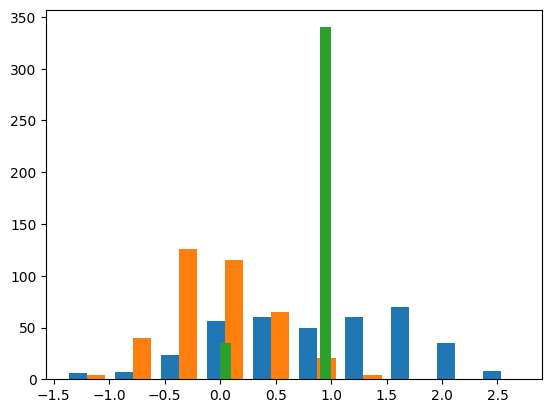

In [196]:
plt.hist(X_train)
plt.hist(Y_train)

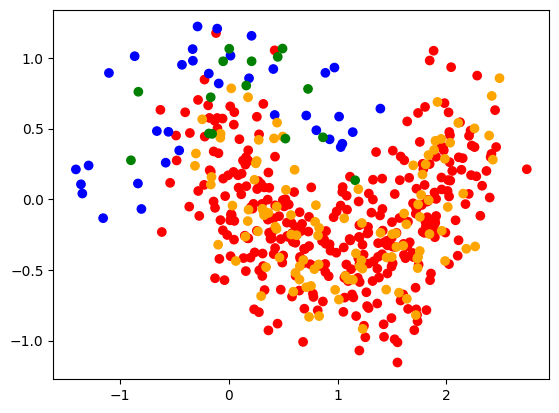

In [197]:
colors = ['blue', 'red']
colors2 = ['green', 'orange']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
vectorizer2 = np.vectorize(lambda x: colors2[x % len(colors2)])
plt.scatter(X_train[:,0], X_train[:,1], c=vectorizer(Y_train))
plt.scatter(X_test[:,0], X_test[:,1], c=vectorizer2(Y_test))

In [207]:
model3 = DecisionTreeClassifier(criterion="gini",random_state=0)
model3.fit(X_train,Y_train)
model4 = DecisionTreeClassifier(criterion="entropy",random_state=0)
model4.fit(X_train,Y_train)
model5 = DecisionTreeClassifier(criterion="log_loss",random_state=0)
model5.fit(X_train,Y_train)

print("Gini: ")
print(model3.score(X_test,Y_test))
print("Entropy: ")
print(model4.score(X_test,Y_test))
print("Log_loss: ")
print(model5.score(X_test,Y_test))

Gini: 
0.936
Entropy: 
0.936
Log_loss: 
0.936


## Performance Analysis

First, the decision tree classifier and the decision tree regressor were analyzed. The decision tree classifier had a far better coefficient of determination than the the regressor, although different R^2 methods were used (since the .score method was being called on a classifier and a regressor which cannot be evaluated in exactly the same way). Other metrics that would typically evaluate the performance of a regressor had similar figures for the regressor and classifier. Based on the significantly higher R^2 value, it made sense to move forward with optimizing the classifier. The criterion for the classifier was altered, and all three criterion produced the same result as the original (R^2=.936). Therefore, it is reasonable to assume that the classifier cannot be significantly optimized further by altering the criterion. 

With a high R^2 value, the performance of the decision tree classifier is very good on this dataset. The model using a decision tree classifier was able to accurately predict the test data, as shown in the scatterplot. The decision tree classifier could potentially be further optimized by 